objective - explore features looking for correlation

pca hue by score

scatter avg housing 21 to score

heat map of features, 

run predictive_power - or should this go into preprocessing? 


In [3]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import dabl

In [2]:
county_avg = pd.read_csv('../../data/processed/county_avg.csv')
county_avg.head()

,CountyName,Avg_21,Estimated Total Population,est_num_u17_pov,Mean Scale Score,Percentage Standard Exceeded
0,Alameda County,1.025446e+06,95843.819121,935.710594,2523.700796,26.665568
1,Alpine County,4.629460e+05,1119.000000,32.000000,NaN,24.285000
2,Amador County,4.085107e+05,40083.000000,546.000000,2460.990323,10.384286
3,Butte County,3.606030e+05,29545.212500,709.675000,2492.441704,12.713974
4,Calaveras County,3.781395e+05,23344.568182,473.409091,2458.357534,10.412577


In [5]:
df = pd.read_csv('../../data/by_student_group/grocery_added.csv',low_memory=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316683 entries, 0 to 316682
Columns: 103 entries, Unnamed: 0 to Grocery_dist
dtypes: float64(59), int64(8), object(36)
memory usage: 248.9+ MB


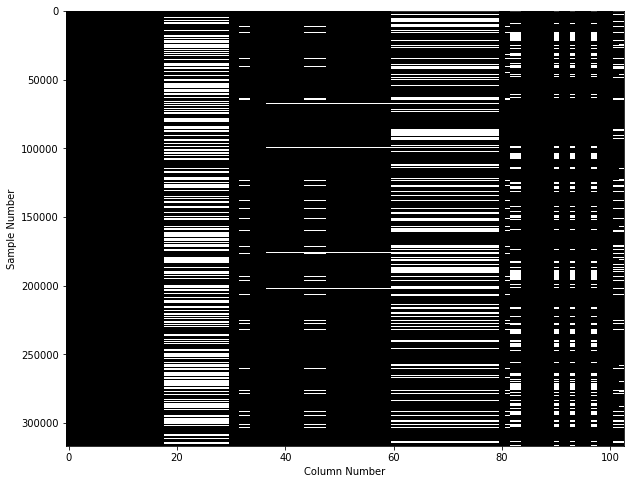

In [35]:
plt.figure(figsize=(10, 8))
plt.imshow(df.isna(), aspect="auto", interpolation="nearest", cmap="gray")
plt.xlabel("Column Number")
plt.ylabel("Sample Number");

In [ ]:
for boxplots - 
highest grade = type of school ( map this)
student group
avg21 /1000 ( to scale to other features)
grocery 3 mile (scaled x 100 to get to k area)
mean test score
% exceeds
% lowest
'Enrollment', 'Free_Meal_count',
       'Percent_Eligible', 'FRPM_Count',
    'Total Students, All Grades (Includes AE) [Public School] 2020-21',


In [ ]:
## by county average box plots 

In [6]:
df.columns.values

array(['Unnamed: 0', 'County Code', 'District Code', 'School Code',
       'Student Group ID', 'Total Tested at Reporting Level',
       'Total Tested with Scores at Reporting Level', 'Grade', 'Test ID',
       'Students Enrolled', 'Students Tested', 'Mean Scale Score',
       'Percentage Standard Exceeded', 'Percentage Standard Met',
       'Percentage Standard Met and Above',
       'Percentage Standard Nearly Met', 'Percentage Standard Not Met',
       'Students with Scores', 'Area 1 Percentage Above Standard',
       'Area 1 Percentage Near Standard',
       'Area 1 Percentage Below Standard',
       'Area 2 Percentage Above Standard',
       'Area 2 Percentage Near Standard',
       'Area 2 Percentage Below Standard',
       'Area 3 Percentage Above Standard',
       'Area 3 Percentage Near Standard',
       'Area 3 Percentage Below Standard',
       'Area 4 Percentage Above Standard',
       'Area 4 Percentage Near Standard',
       'Area 4 Percentage Below Standard', 'County Nam

In [14]:
 df['School Type [Public School] 2020-21'].value_counts()

1-Regular school              231156
4-Alternative/other school      9200
2-Special education school       247
Name: School Type [Public School] 2020-21, dtype: int64

/Users/robertrustia/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/robertrustia/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


/Users/robertrustia/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


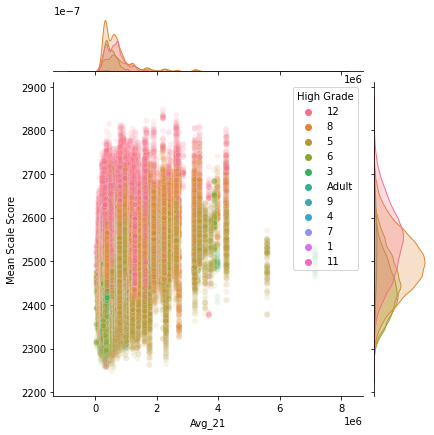

In [12]:

sns.jointplot(x= 'Avg_21', y='Mean Scale Score', hue='High Grade',data=df, alpha = 0.1)


In [37]:
df['Grades 9-12 Students [Public School] 2020-21'].value_counts()

†      192215
374       298
–         261
159       219
535       218
        ...  
39          6
40          6
48          6
111         6
83          5
Name: Grades 9-12 Students [Public School] 2020-21, Length: 783, dtype: int64

In [40]:
df['Grades 9-12 Students [Public School] 2020-21'] = df['Grades 9-12 Students [Public School] 2020-21'].apply(pd.to_numeric,errors='coerce')

In [45]:
df['High Grade'] = df['High Grade'].apply(pd.to_numeric,errors='coerce')

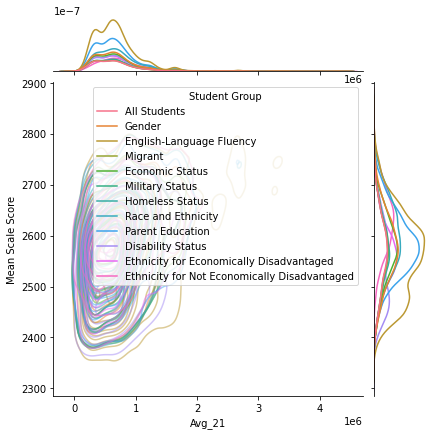

In [48]:
dfh = df[df['Grade']==11]
sns.jointplot(x= 'Avg_21', y='Mean Scale Score', hue='Student Group',data=dfh,kind="kde", alpha = 0.5)


In [42]:
df['High Grade'].value_counts()

8        116668
12        77938
5         58694
6         48143
Adult      8598
4          1282
7          1243
3          1096
9           248
11           44
1            38
Name: High Grade, dtype: int64

In [30]:
df['Grade'].value_counts()

11    56794
5     49377
4     48935
3     48073
6     41637
8     35958
7     35909
Name: Grade, dtype: int64

In [31]:
df['Student Group'].value_counts()

English-Language Fluency                        65038
Parent Education                                40179
Race and Ethnicity                              30222
Gender                                          29566
Economic Status                                 25533
Disability Status                               21855
Homeless Status                                 17911
Military Status                                 17496
Ethnicity for Not Economically Disadvantaged    17452
Migrant                                         17365
All Students                                    17093
Ethnicity for Economically Disadvantaged        16973
Name: Student Group, dtype: int64

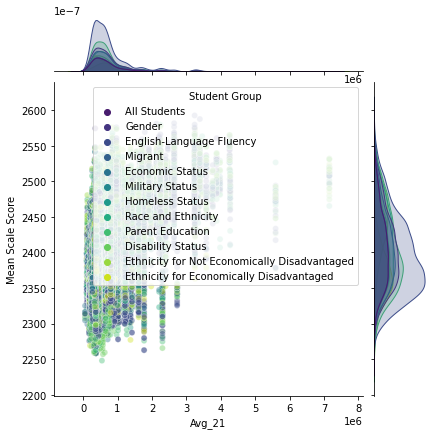

In [27]:
df3 = df[df['Grade']==3]
sns.color_palette("mako", as_cmap=True)
sns.jointplot(x= 'Avg_21', y='Mean Scale Score', hue='Student Group',palette="viridis",data=df3, alpha = 0.4)


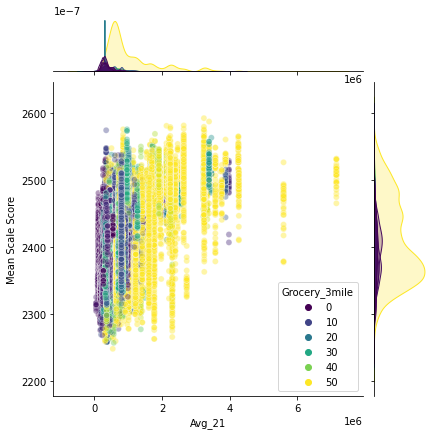

In [18]:
df3 = df[df['Grade']==3]
sns.color_palette("mako", as_cmap=True)
sns.jointplot(x= 'Avg_21', y='Mean Scale Score', hue='Grocery_3mile',palette="viridis",data=df3, alpha = 0.4)


/Users/robertrustia/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/robertrustia/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/robertrustia/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/robertrustia/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/robertrustia/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/robertrustia/opt/anaconda3/lib/python3.8/si

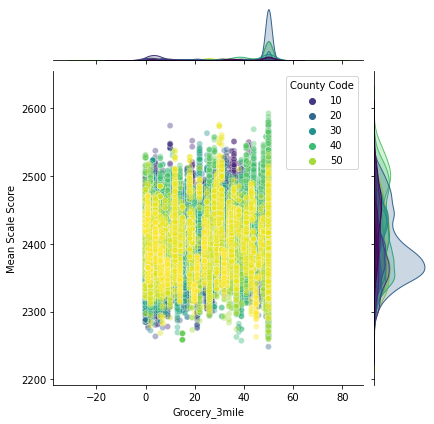

In [24]:
df3 = df[df['Grade']==3]

sns.jointplot(x= 'Grocery_3mile', y='Mean Scale Score', hue='County Code',palette="viridis",data=df3, alpha = 0.4)

#               hue=School Type [Public School] 2020-21',palette="viridis",

In [ ]:
sns.pairplot(
    df_X, plot_kws={"s": 3, "alpha": 0.2}, hue="Police_Force", palette="Spectral",
    x_vars=["Location_Easting_OSGR", "Location_Northing_OSGR", "Longitude"],
    y_vars="Latitude");



In [34]:
import missingno as msno

ModuleNotFoundError: No module named 'missingno'

In [ ]:


msno.matrix(df, labels=True, sort="descending");

In [ ]:
# Create a figure with 3 x 2 subplots
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(16, 8))

# Loop through these features and plot entries from each feature against `Latitude`
for col, ax in zip(selected_features, axes.ravel()):
    sns.violinplot(data=df_X, x=col, y=df_X["Latitude"], palette="Set2",
                   split=True, hue="Urban_or_Rural_Area", ax=ax)
plt.tight_layout();

In [ ]:
# Specify features of interest
selected_features = ["Vehicle_Reference_df_res", "Towing_and_Articulation",
                     "Skidding_and_Overturning", "Bus_or_Coach_Passenger",
                     "Pedestrian_Road_Maintenance_Worker", "Age_Band_of_Driver"]

# Create a figure with 3 x 2 subplots
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(16, 8))

# Loop through these features and plot entries from each feature against `Latitude`
for col, ax in zip(selected_features, axes.ravel()):
    sns.stripplot(data=df_X, x=col, y=df_X["Latitude"], ax=ax,
                  palette="tab10", size=2, alpha=0.5)
plt.tight_layout();


In [ ]:
# Specify features of interest
selected_features = ["Vehicle_Reference_df_res", "Towing_and_Articulation",
                     "Skidding_and_Overturning", "Bus_or_Coach_Passenger",
                     "Pedestrian_Road_Maintenance_Worker", "Age_Band_of_Driver"]

# Create a figure with 3 x 2 subplots
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(16, 8))

# Loop through these features and plot entries from each feature against `Latitude`
for col, ax in zip(selected_features, axes.ravel()):
    sns.stripplot(data=df_X, x=col, y=df_X["Latitude"], ax=ax,
                  palette="tab10", size=2, alpha=0.5)
plt.tight_layout();

<function matplotlib.pyplot.show(close=None, block=None)>

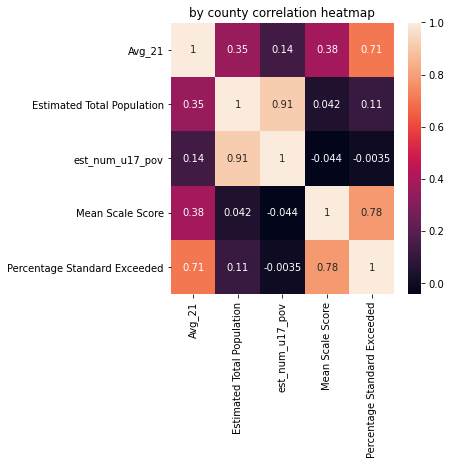

In [15]:
fig, ax = plt.subplots(figsize=(5,5))
fig = sns.heatmap(county_avg.corr(),annot=True)
plt.title('by county correlation heatmap')
plt.show

In [34]:
swh=pd.read_csv('../../data/by_student_group/dfs_dist_housing.csv',low_memory=False)
swh.drop(columns=['Unnamed: 0'])

,County Code,District Code,School Code,Student Group ID,Total Tested at Reporting Level,Total Tested with Scores at Reporting Level,Grade,Test ID,Students Enrolled,Students Tested,...,2020–21 P‑2 ADA,% Salary Change Over 2019–20,CDS,EDP 365,Current\nExpense ADA,Current\nExpense Per ADA,LEA Type,Estimated Total Population,Estimated Population 5-17,est_num_u17_pov
0,1,10017,112607,1,108.0,106.0,6,English Language Arts/Literacy,21.0,20.0,...,18860.292764,3.017373,NaN,2.857007e+08,18835.046896,13998.450902,NaN,184134.978840,26713.578130,3044.345812
1,1,10017,112607,6,93.0,91.0,6,English Language Arts/Literacy,18.0,17.0,...,18860.292764,3.017373,NaN,2.857007e+08,18835.046896,13998.450902,NaN,184134.978840,26713.578130,3044.345812
2,1,10017,112607,29,108.0,106.0,6,English Language Arts/Literacy,21.0,20.0,...,18860.292764,3.017373,NaN,2.857007e+08,18835.046896,13998.450902,NaN,184134.978840,26713.578130,3044.345812
3,1,10017,112607,31,80.0,78.0,6,English Language Arts/Literacy,14.0,13.0,...,18860.292764,3.017373,NaN,2.857007e+08,18835.046896,13998.450902,NaN,184134.978840,26713.578130,3044.345812
4,1,10017,112607,51,108.0,106.0,6,English Language Arts/Literacy,21.0,20.0,...,18860.292764,3.017373,NaN,2.857007e+08,18835.046896,13998.450902,NaN,184134.978840,26713.578130,3044.345812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316678,58,72751,6118806,6,31.0,31.0,4,Mathematics,14.0,13.0,...,8547.131947,0.066064,NaN,1.083580e+08,8547.636272,13073.661487,NaN,60863.698388,11812.984664,2401.075108
316679,58,72751,6118806,29,31.0,31.0,4,Mathematics,14.0,13.0,...,8547.131947,0.066064,NaN,1.083580e+08,8547.636272,13073.661487,NaN,60863.698388,11812.984664,2401.075108
316680,58,72751,6118806,53,29.0,29.0,4,Mathematics,12.0,11.0,...,8547.131947,0.066064,NaN,1.083580e+08,8547.636272,13073.661487,NaN,60863.698388,11812.984664,2401.075108
316681,58,72751,6118806,99,26.0,26.0,4,Mathematics,13.0,12.0,...,8547.131947,0.066064,NaN,1.083580e+08,8547.636272,13073.661487,NaN,60863.698388,11812.984664,2401.075108


In [36]:
swh['LEA Type'].value_counts()

Unified       168181
Elementary     54400
High           14373
Name: LEA Type, dtype: int64

In [ ]:
## need to add student group, district, zip code,
##grocery_store, park, fast_food, distance

In [35]:
swh.columns.values

array(['Unnamed: 0', 'County Code', 'District Code', 'School Code',
       'Student Group ID', 'Total Tested at Reporting Level',
       'Total Tested with Scores at Reporting Level', 'Grade', 'Test ID',
       'Students Enrolled', 'Students Tested', 'Mean Scale Score',
       'Percentage Standard Exceeded', 'Percentage Standard Met',
       'Percentage Standard Met and Above',
       'Percentage Standard Nearly Met', 'Percentage Standard Not Met',
       'Students with Scores', 'Area 1 Percentage Above Standard',
       'Area 1 Percentage Near Standard',
       'Area 1 Percentage Below Standard',
       'Area 2 Percentage Above Standard',
       'Area 2 Percentage Near Standard',
       'Area 2 Percentage Below Standard',
       'Area 3 Percentage Above Standard',
       'Area 3 Percentage Near Standard',
       'Area 3 Percentage Below Standard',
       'Area 4 Percentage Above Standard',
       'Area 4 Percentage Near Standard',
       'Area 4 Percentage Below Standard', 'County Nam

## convert student group to numeric 

In [54]:
convert= [ 'Pupil/Teacher Ratio [Public School] 2020-21',
       'Hispanic - male [Public School] 2020-21',
       'Hispanic - female [Public School] 2020-21',
       'Black or African American - male [Public School] 2020-21',
       'Black or African American - female [Public School] 2020-21',
       'Asian or Asian/Pacific Islander - male [Public School] 2020-21',
       'Asian or Asian/Pacific Islander - female [Public School] 2020-21',
       'National School Lunch Program [Public School] 2020-21',
   ]

In [55]:
swh[convert] = swh[convert].apply(pd.to_numeric,errors='coerce')

In [60]:
columns = swh[['County Name_x',
       'District Name_x', 'School Name_x', 'Zip_Code','Student Group ID', 
       'Total Tested with Scores at Reporting Level', 'Grade', 
       'Students Tested', 'Percentage Standard Met',
  'Percentage Standard Not Met','Full-Time Equivalent (FTE) Teachers [Public School] 2020-21',
       'Pupil/Teacher Ratio [Public School] 2020-21',
       'Hispanic - male [Public School] 2020-21',
       'Hispanic - female [Public School] 2020-21',
       'Black or African American - male [Public School] 2020-21',
       'Black or African American - female [Public School] 2020-21',
       'Asian or Asian/Pacific Islander - male [Public School] 2020-21',
       'Asian or Asian/Pacific Islander - female [Public School] 2020-21',
      'Avg_21','School Type [Public School] 2020-21', 'Latitude', 'Longitude',
       'Percentage Standard Exceeded','Estimated Population 5-17',
       'est_num_u17_pov', 'Avg_21', 'Mean Scale Score']]

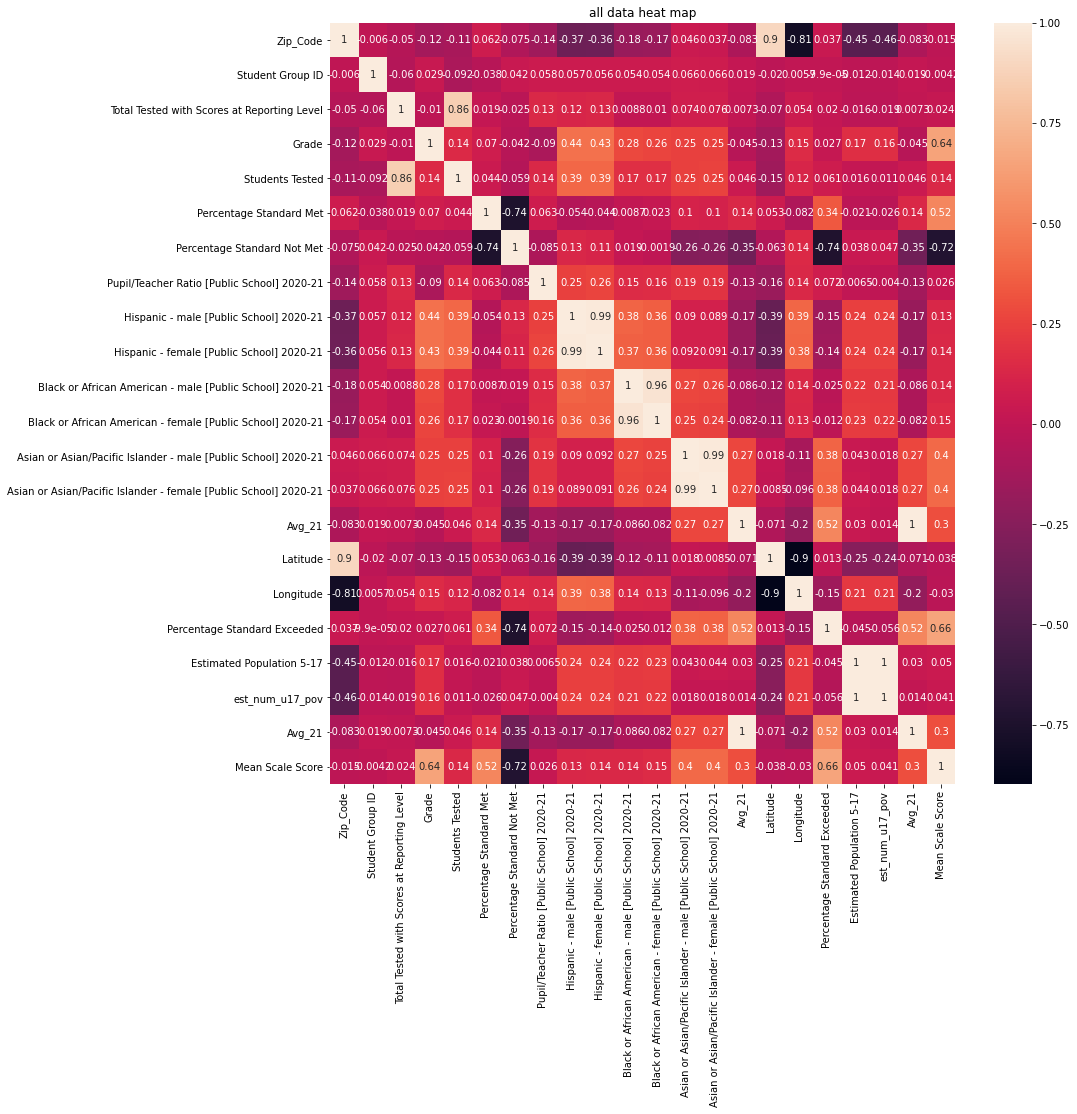

In [61]:
fig,ax = plt.subplots(figsize=(14,14))
fig=sns.heatmap(columns.corr(),annot=True)
plt.title('all data heat map')
plt.show()

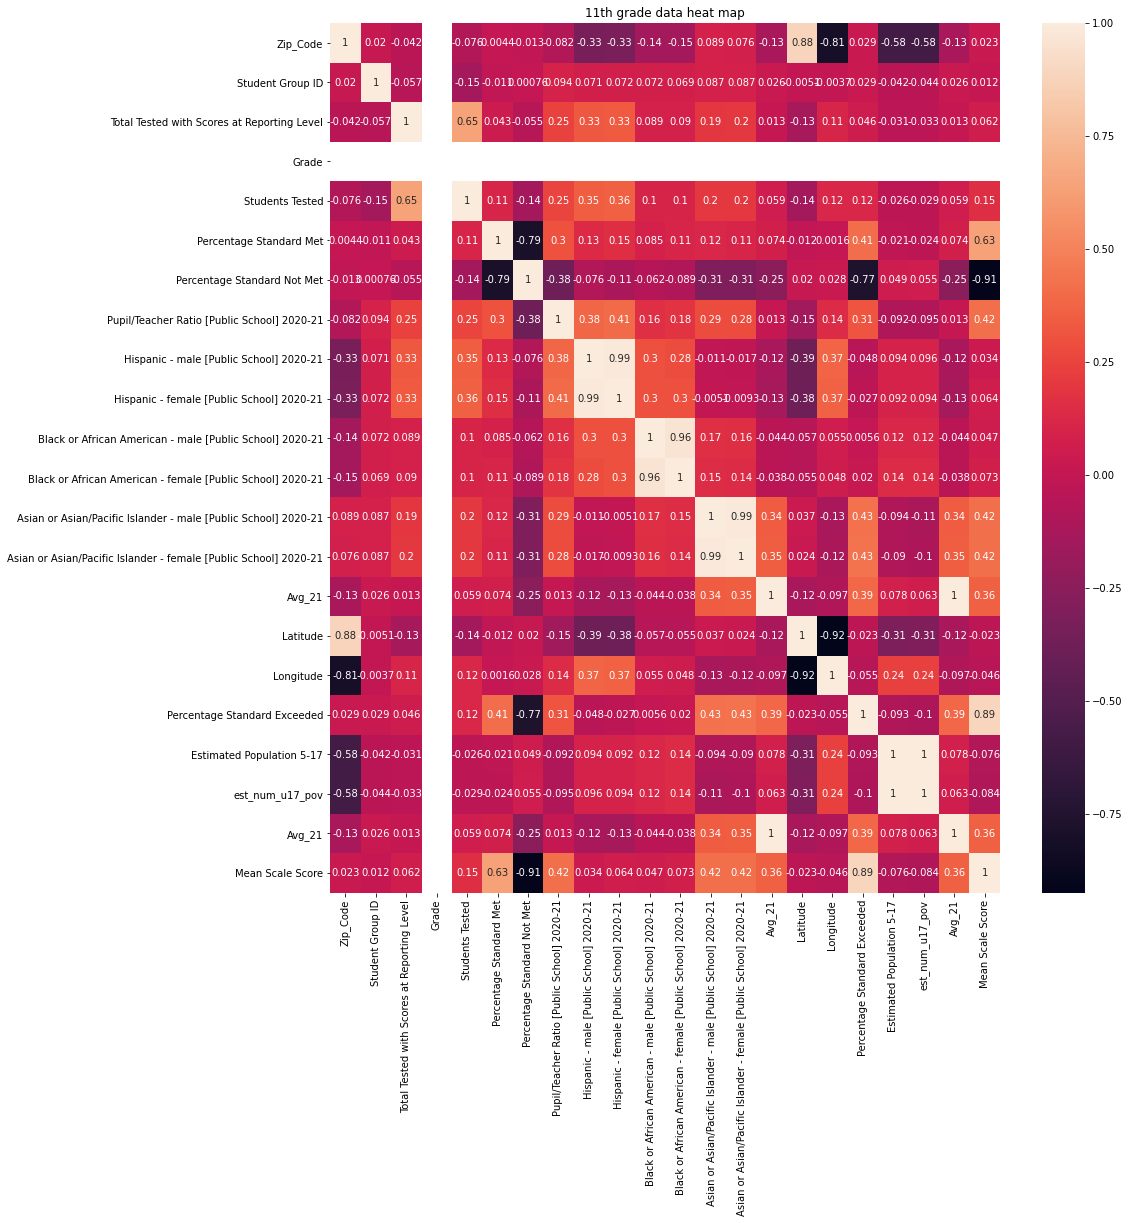

In [63]:
fig,ax = plt.subplots(figsize=(15,16))
fig=sns.heatmap(columns[columns['Grade']==11].corr(),annot=True)
plt.title('11th grade data heat map')
plt.show()

In [64]:
dabl.plot(swh[swh['Grade']==11][['Percentage Standard Exceeded', 'Percentage Standard Met',
       'Percentage Standard Met and Above', 'Percentage Standard Nearly Met',
       'Percentage Standard Not Met','Mean Scale Score',
'Total Staff [District] 2020-21',
       'Paraprofessionals/Instructional Aides [District] 2020-21',
       'Total Guidance Counselors [District] 2020-21',
       'School Psychologist [District] 2020-21',
       'Other Support Services Staff [District] 2020-21', 
        'Total Students, All Grades (Excludes AE) [District] 2020-21',
       'Full-Time Equivalent (FTE) Teachers [District] 2020-21',
       'Pupil/Teacher Ratio [District] 2020-21',
       'Estimated Total Population', 'Estimated Population 5-17',
       'est_num_u17_pov', 'Avg_21', 'City','CountyName' ]], target_col='Mean Scale Score')

KeyError: "['Total Staff [District] 2020-21', 'Other Support Services Staff [District] 2020-21', 'Paraprofessionals/Instructional Aides [District] 2020-21', 'City', 'Pupil/Teacher Ratio [District] 2020-21', 'Total Students, All Grades (Excludes AE) [District] 2020-21', 'Full-Time Equivalent (FTE) Teachers [District] 2020-21', 'CountyName', 'School Psychologist [District] 2020-21', 'Total Guidance Counselors [District] 2020-21'] not in index"

In [ ]:
dabl.plot(merg[merg['Grade']==6][['Percentage Standard Exceeded', 'Percentage Standard Met',
       'Percentage Standard Met and Above', 'Percentage Standard Nearly Met',
       'Percentage Standard Not Met','Mean Scale Score',
'Total Staff [District] 2020-21',
       'Paraprofessionals/Instructional Aides [District] 2020-21',
       'Total Guidance Counselors [District] 2020-21',
       'School Psychologist [District] 2020-21',
       'Other Support Services Staff [District] 2020-21', 
        'Total Students, All Grades (Excludes AE) [District] 2020-21',
       'Full-Time Equivalent (FTE) Teachers [District] 2020-21',
       'Pupil/Teacher Ratio [District] 2020-21',
       'Estimated Total Population', 'Estimated Population 5-17',
       'est_num_u17_pov', 'Avg_21', 'City','CountyName' ]], target_col='Mean Scale Score')

In [ ]:
data =defenders[['pAdj_Tackle_int_blocks','pct_long_balls','Progressive_play','attacking_touches','True_tackle_pct'
]]
# Function to calculate correlation coefficient between two arrays
def corr(x, y, **kwargs):
    # Calculate the value
    coef = np.corrcoef(x, y)[0][1]
    # Make the label
    label = r'$\rho$ = ' + str(round(coef, 2))
    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy = (0.2, 0.95), size = 20, xycoords = ax.transAxes)
    
# Create a pair grid instance
grid = sns.PairGrid(data= data,vars = ['pAdj_Tackle_int_blocks','pct_long_balls','Progressive_play','attacking_touches','True_tackle_pct'], size = 4)

# # Map the plots to the locations
grid = grid.map_upper(plt.scatter, color = 'Blue')
grid = grid.map_upper(corr)
grid = grid.map_lower(sns.kdeplot, cmap = 'Blues')
grid = grid.map_diag(plt.hist, bins = 10, edgecolor =  'k', );

In [ ]:
corr = defenders[['Aerial_win_pct','pAdj_Tackle_int_blocks','True_tackle_pct','pAdj_Recoveries','pct_long_balls','Progressive_play','attacking_touches','Key_pass',
 'Comp_prog','avg_shrt+med_pass_pct','Long_Cmp_pct']].corr()

fig, ax = plt.subplots()
fig.set_size_inches(15.5, 8.5)

ax = sns.heatmap(corr,vmin=-1, vmax=1, center=0,cmap="YlGnBu",annot=True,square=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right');

In [ ]:
graph = defenders.loc[(df['pAdj_Tackle_int_blocks']<35)&(df['Position']=='DF')&(df['Aerial_win_pct']<100)&
               (df['Aerial_win_pct']>0)&(df['Nineties']>10)]
sns.set_style('whitegrid')

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
x =graph['pAdj_Tackle_int_blocks']
y = graph['Aerial_win_pct']
p = graph['player_name']

g = sns.scatterplot(data=graph, x =x, y=y ,
                    hue='Squad_from_op',
                ax=ax).set(title='Defender Aerial win pct Vs Tackles Interceptions Blocks')
for p, x, y in zip(p, x, y):
    if p == 'Walker Zimmerman':
        plt.annotate(p, (x, y))
    if y > 77:
         plt.annotate(p, (x, y))
    if x > 13:
        plt.annotate(p,(x,y))

plt.tight_layout()